# Tarea 3

Daniela Paz Díaz Mora

201710003-6

In [1]:
import numpy as np
import pandas as pd
import os
from sympy import Matrix
from sympy.abc import x, y
from numpy import linalg

## Problema 4

####  Este problema consiste en modelar las rentabilidades de los fondos de pensiones a través de un modelo Var(p). Para esto considere la base de datos de las AFP Cuprum, Habitat, PlanVital y Provida. Elija un fondo de pensiones que usted desee modelar (A, B, C, D, **E**). 

### a) Grafique las series de tiempo multivariada que seleccionó, como función del tiempo

In [2]:
afp_ds=pd.read_csv(os.path.join('data','AFP_returns.csv'),index_col='Date')

In [3]:
afp_ds

,Capital.A,Capital.B,Capital.C,Capital.D,Capital.E,Cuprum.A,Cuprum.B,Cuprum.C,Cuprum.D,Cuprum.E,...,ProVida.A,ProVida.B,ProVida.C,ProVida.D,ProVida.E,system.A,system.B,system.C,system.D,system.E
Date,,,,,,,,,,,,,,,,,,,,,
2005-08,NaN,NaN,NaN,NaN,NaN,-0.62,-0.56,-0.31,0.05,0.77,...,-0.60,-0.39,-0.26,0.14,0.77,-0.67,-0.47,-0.31,0.07,0.75
2005-09,NaN,NaN,NaN,NaN,NaN,3.03,2.10,1.32,0.60,-0.38,...,3.44,2.14,1.23,0.39,-0.55,3.21,2.17,1.22,0.49,-0.51
2005-10,NaN,NaN,NaN,NaN,NaN,-4.17,-3.58,-3.09,-3.00,-3.03,...,-4.49,-3.91,-3.38,-2.92,-2.75,-4.28,-3.72,-3.21,-2.85,-2.81
2005-11,NaN,NaN,NaN,NaN,NaN,2.11,0.80,-0.14,-0.68,-0.95,...,2.50,0.77,-0.24,-0.53,-0.79,2.23,0.84,-0.22,-0.54,-0.87
2005-12,NaN,NaN,NaN,NaN,NaN,1.64,0.91,0.61,0.51,0.96,...,1.85,0.83,0.63,0.39,0.74,1.65,0.89,0.61,0.49,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12,-4.20,-2.35,-0.09,1.85,2.86,-4.13,-2.30,-0.24,2.04,2.93,...,-4.24,-2.24,-0.09,2.09,2.99,-4.27,-2.41,-0.27,1.86,2.71
2020-01,4.11,3.13,2.09,1.16,0.50,3.89,2.99,2.09,1.22,0.70,...,3.89,2.97,2.00,1.10,0.51,4.00,3.07,2.11,1.19,0.57
2020-02,-4.40,-3.76,-3.68,-3.82,-2.91,-4.53,-3.83,-3.76,-3.81,-2.91,...,-4.38,-3.79,-3.72,-3.81,-3.20,-4.46,-3.76,-3.64,-3.76,-2.88


In [4]:
#se selcciona el fondo E
habitat=pd.Series(afp_ds['Habitat.E'])
cuprum=pd.Series(afp_ds['Cuprum.E'])
provida=pd.Series(afp_ds['ProVida.E'])
planvital=pd.Series(afp_ds['PlanVital.E'])

In [5]:
import matplotlib.pyplot as plt

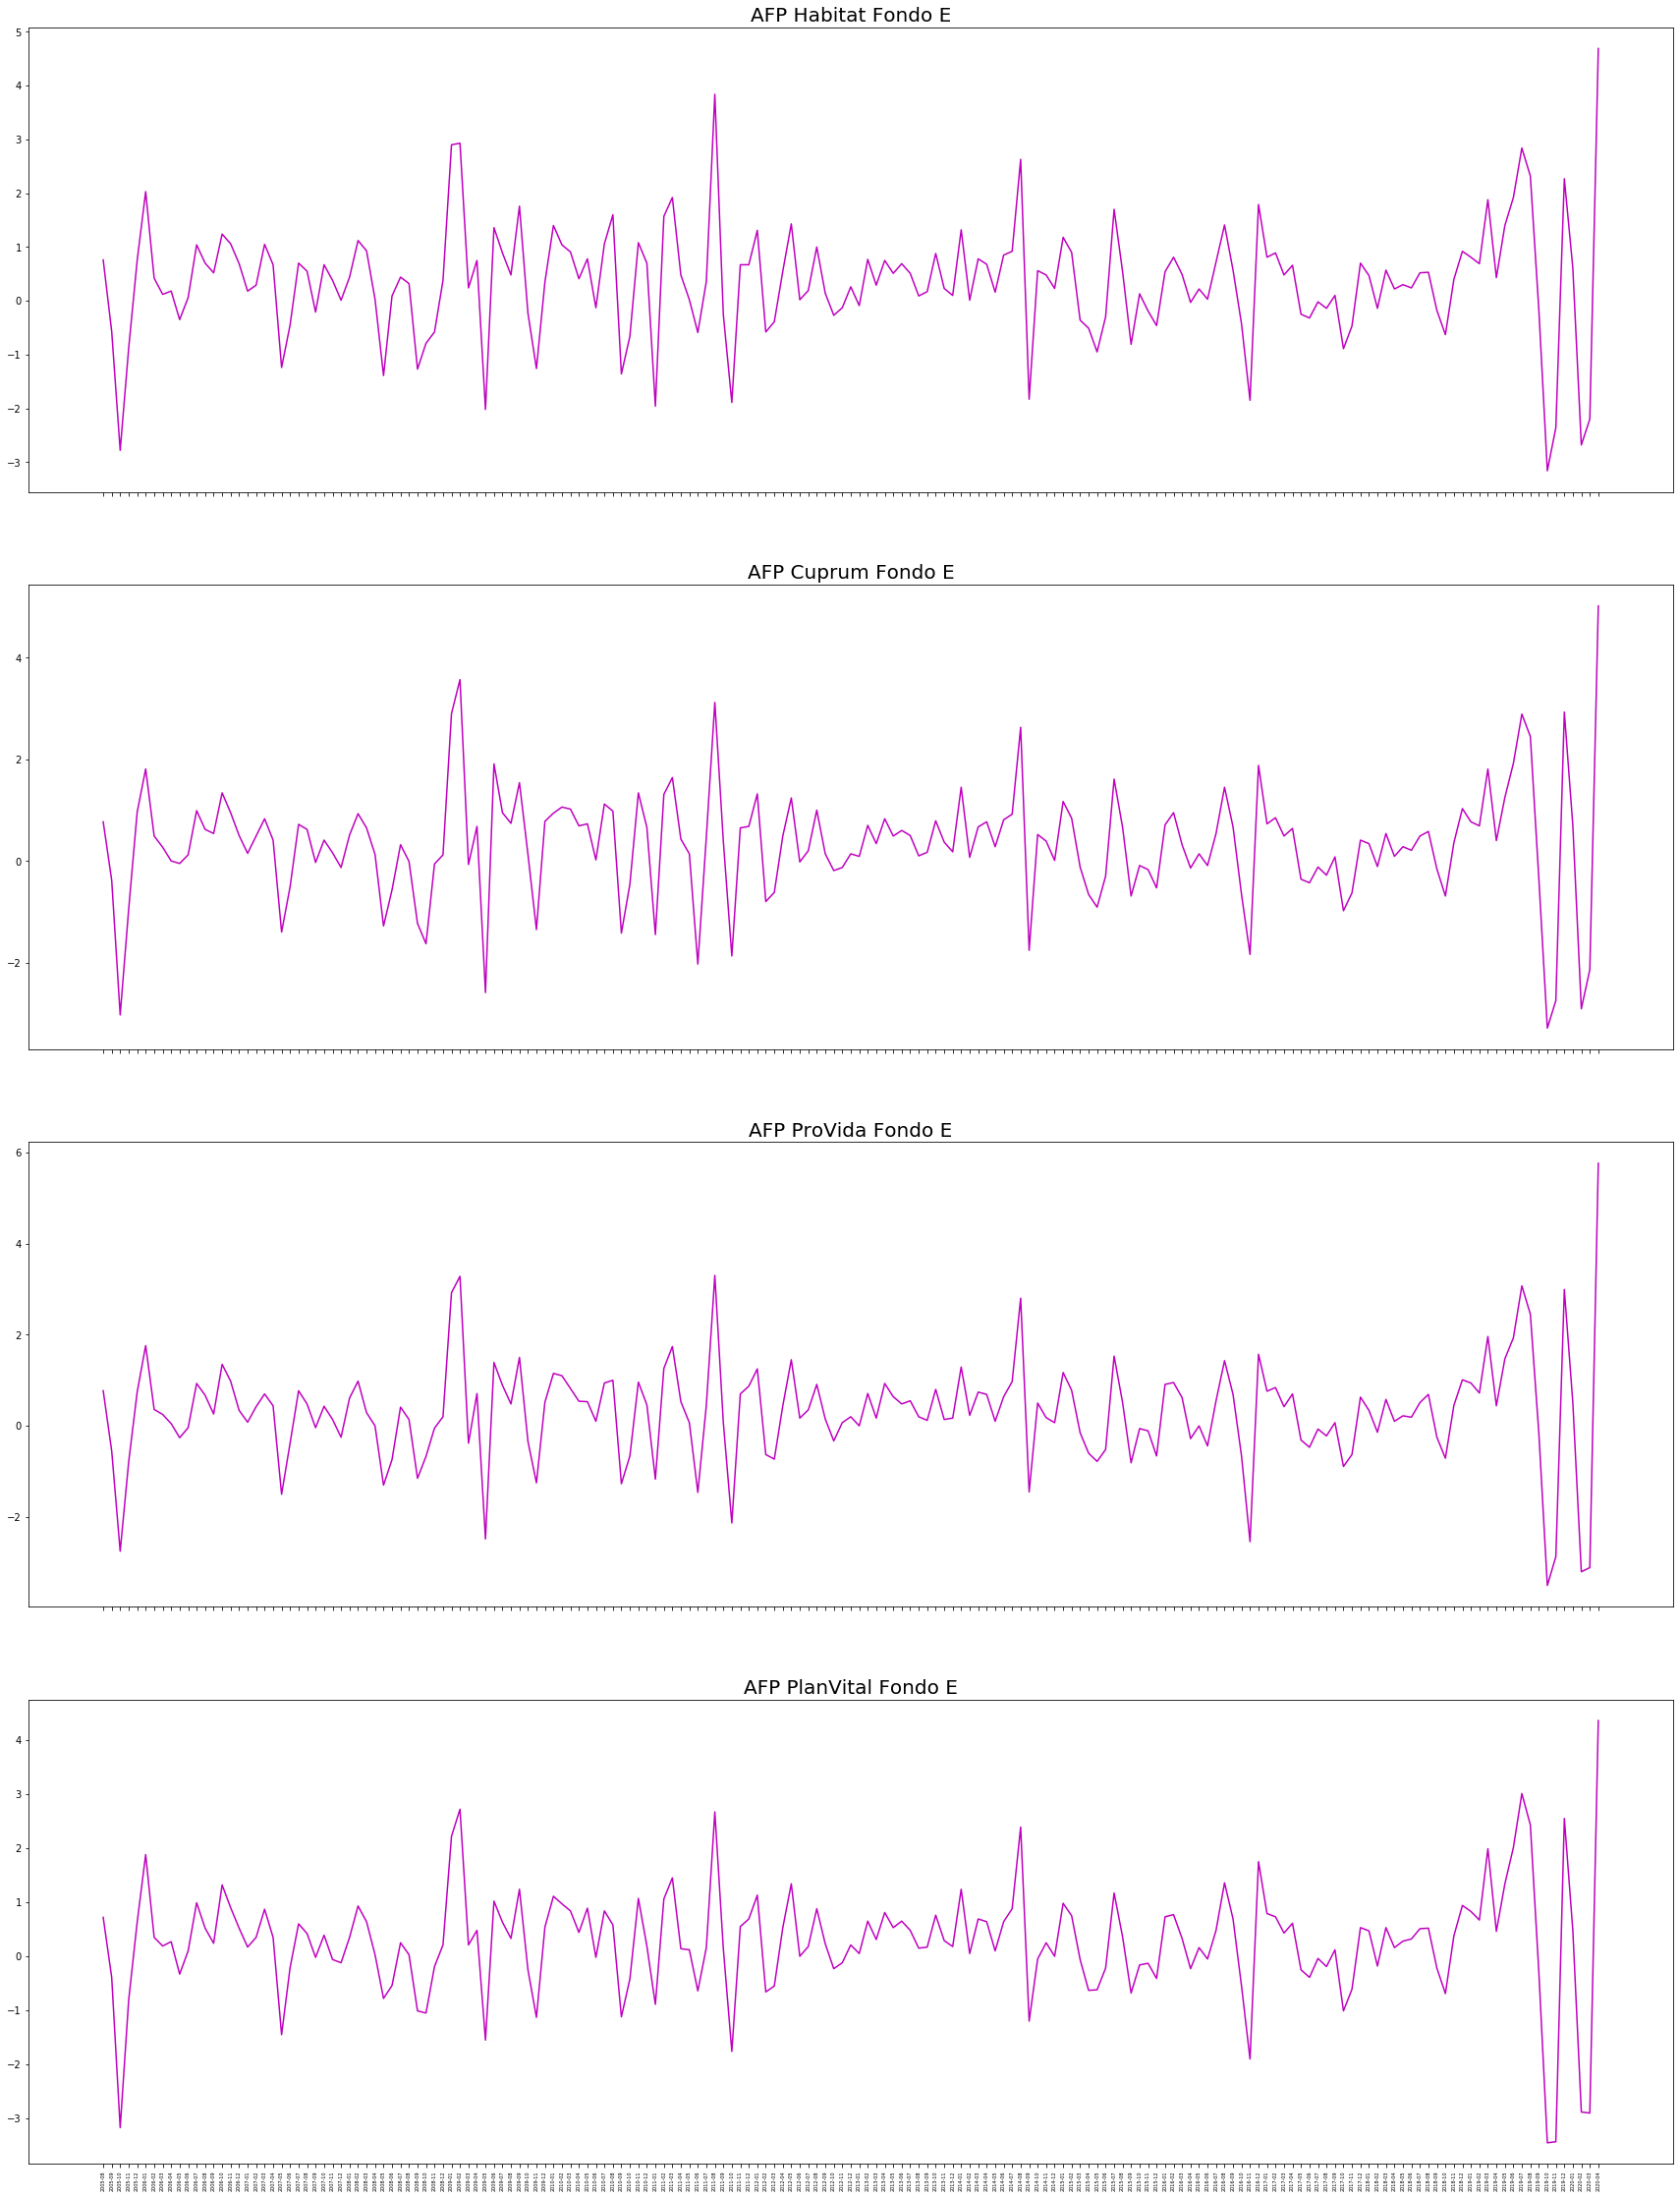

In [6]:
fig, axs = plt.subplots(4,sharex=True,figsize=(30,40))
axs[0].plot(habitat,c='m')
axs[0].set_title('AFP Habitat Fondo E',fontsize=20)
axs[1].plot(cuprum,c='m')
axs[1].set_title('AFP Cuprum Fondo E',fontsize=20)
axs[2].plot(provida,c='m')
axs[2].set_title('AFP ProVida Fondo E',fontsize=20)
axs[3].plot(planvital,c='m')
axs[3].set_title('AFP PlanVital Fondo E',fontsize=20)
plt.xticks(rotation=90,fontsize=5)
plt.show()

### b) Usando los criterios discutidos en clase seleccione el orden p de un proceso VAR.

In [7]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.base.datetools import dates_from_str

In [8]:
E=afp_ds[['Habitat.E','PlanVital.E','ProVida.E','Cuprum.E']]
del E.index.name

In [9]:
model=VAR(E)

/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [10]:
print(model.select_order(15))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 2, BIC -> 0, FPE -> 2, HQIC -> 0>


Por lo tanto se escoge p=2 con el estimador FPE y AIC


### c)  Mediante el método de los mínimos cuadrados, obtenga las estimaciones de los parámetros del modelo VAR(p) que usted propone y escriba la ecuación del modelo ajustado. Comente sobre la significancia de los parámetros.

In [11]:
from rpy2.robjects import r

In [12]:
results=model.fit(2,ic='fpe')


In [13]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           vie, 16, oct, 2020
Time:                     23:32:03
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -8.91334
Nobs:                     175.000    HQIC:                  -9.30030
Log likelihood:          -120.374    FPE:                7.02101e-05
AIC:                     -9.56438    Det(Omega_mle):     5.74488e-05
--------------------------------------------------------------------
Results for equation Habitat.E
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.419044         0.088634            4.728           0.000
L1.Habitat.E          -0.193843         0.390385           -0.497           0.620
L1.PlanVital.E         1.072407         0.430692    

In [14]:
results.coefs

array([[[-0.19384255,  1.07240704, -1.09071363,  0.55190926],
        [-0.03659553,  0.890463  , -0.84712047,  0.36449849],
        [ 0.07155499,  0.91675095, -1.01933845,  0.38652041],
        [ 0.11920643,  0.91725223, -1.03994253,  0.3542345 ]],

       [[-0.1193381 ,  0.25766747, -0.04960519, -0.51203919],
        [ 0.02085905,  0.13393728, -0.30869112, -0.25276335],
        [-0.05868134,  0.2098962 , -0.25705614, -0.35248514],
        [-0.08746887,  0.0931993 , -0.19921328, -0.25154424]]])

In [15]:
print(results.model)

### d) ¿Es el proceso estimado estable?

In [16]:
results.roots

array([ 4.43064042-0.j        ,  2.84830021+2.91744287j,
        2.84830021-2.91744287j, -0.68413911+2.09453876j,
       -0.68413911-2.09453876j, -2.08725715-0.j        ,
        0.28737668+1.57560063j,  0.28737668-1.57560063j])

#### Como estan todas las raices fuera del disco unitario se concluye que el proceso es estable

### e)  Considere las ultimas cuatro observaciones de cada serie como si no hubiera sido observada. Entonces, prediga el proceso hasta cuatro pasos adelante y compare el error cuadr´atico medio entre los valores predichos y los valores reales de cada AFP. ¿Para cuál AFP el modelo predice mejor?

In [17]:
forecast_input=E.values[-4:]

In [18]:
forecast_input

array([[ 0.61,  0.48,  0.51,  0.7 ],
       [-2.68, -2.88, -3.2 , -2.91],
       [-2.2 , -2.9 , -3.11, -2.14],
       [ 4.69,  4.36,  5.76,  5.02]])

In [19]:
fc=results.forecast(y=forecast_input,steps=4)
df_forecast=pd.DataFrame(fc,index=E.index[-4:],columns=E.columns+'2d')

In [20]:
df_forecast

,Habitat.E2d,PlanVital.E2d,ProVida.E2d,Cuprum.E2d
2020-01,1.439035,2.033484,1.827754,1.790838
2020-02,-0.976783,-1.196932,-1.461901,-1.279382
2020-03,-0.442214,-0.666802,-0.578199,-0.533834
2020-04,0.661471,0.617307,0.724971,0.699128


In [21]:
E_4=pd.DataFrame(E,index=E.index[-4:],columns=E.columns)
df_forecast.values-E_4.values

array([[ 0.82903523,  1.55348417,  1.31775372,  1.09083825],
       [ 1.70321655,  1.68306811,  1.73809866,  1.63061797],
       [ 1.75778638,  2.23319775,  2.5318006 ,  1.60616609],
       [-4.02852892, -3.74269348, -5.03502872, -4.32087189]])

In [22]:
sum((df_forecast.values-E_4.values)**2)/4

array([5.72677605, 6.0602395 , 9.12974758, 6.27463661])

### f)  Grafique las series y sus predicciones en un sólo gráfico, incluyendo intervalos de confianza del 95% para cada predicción.

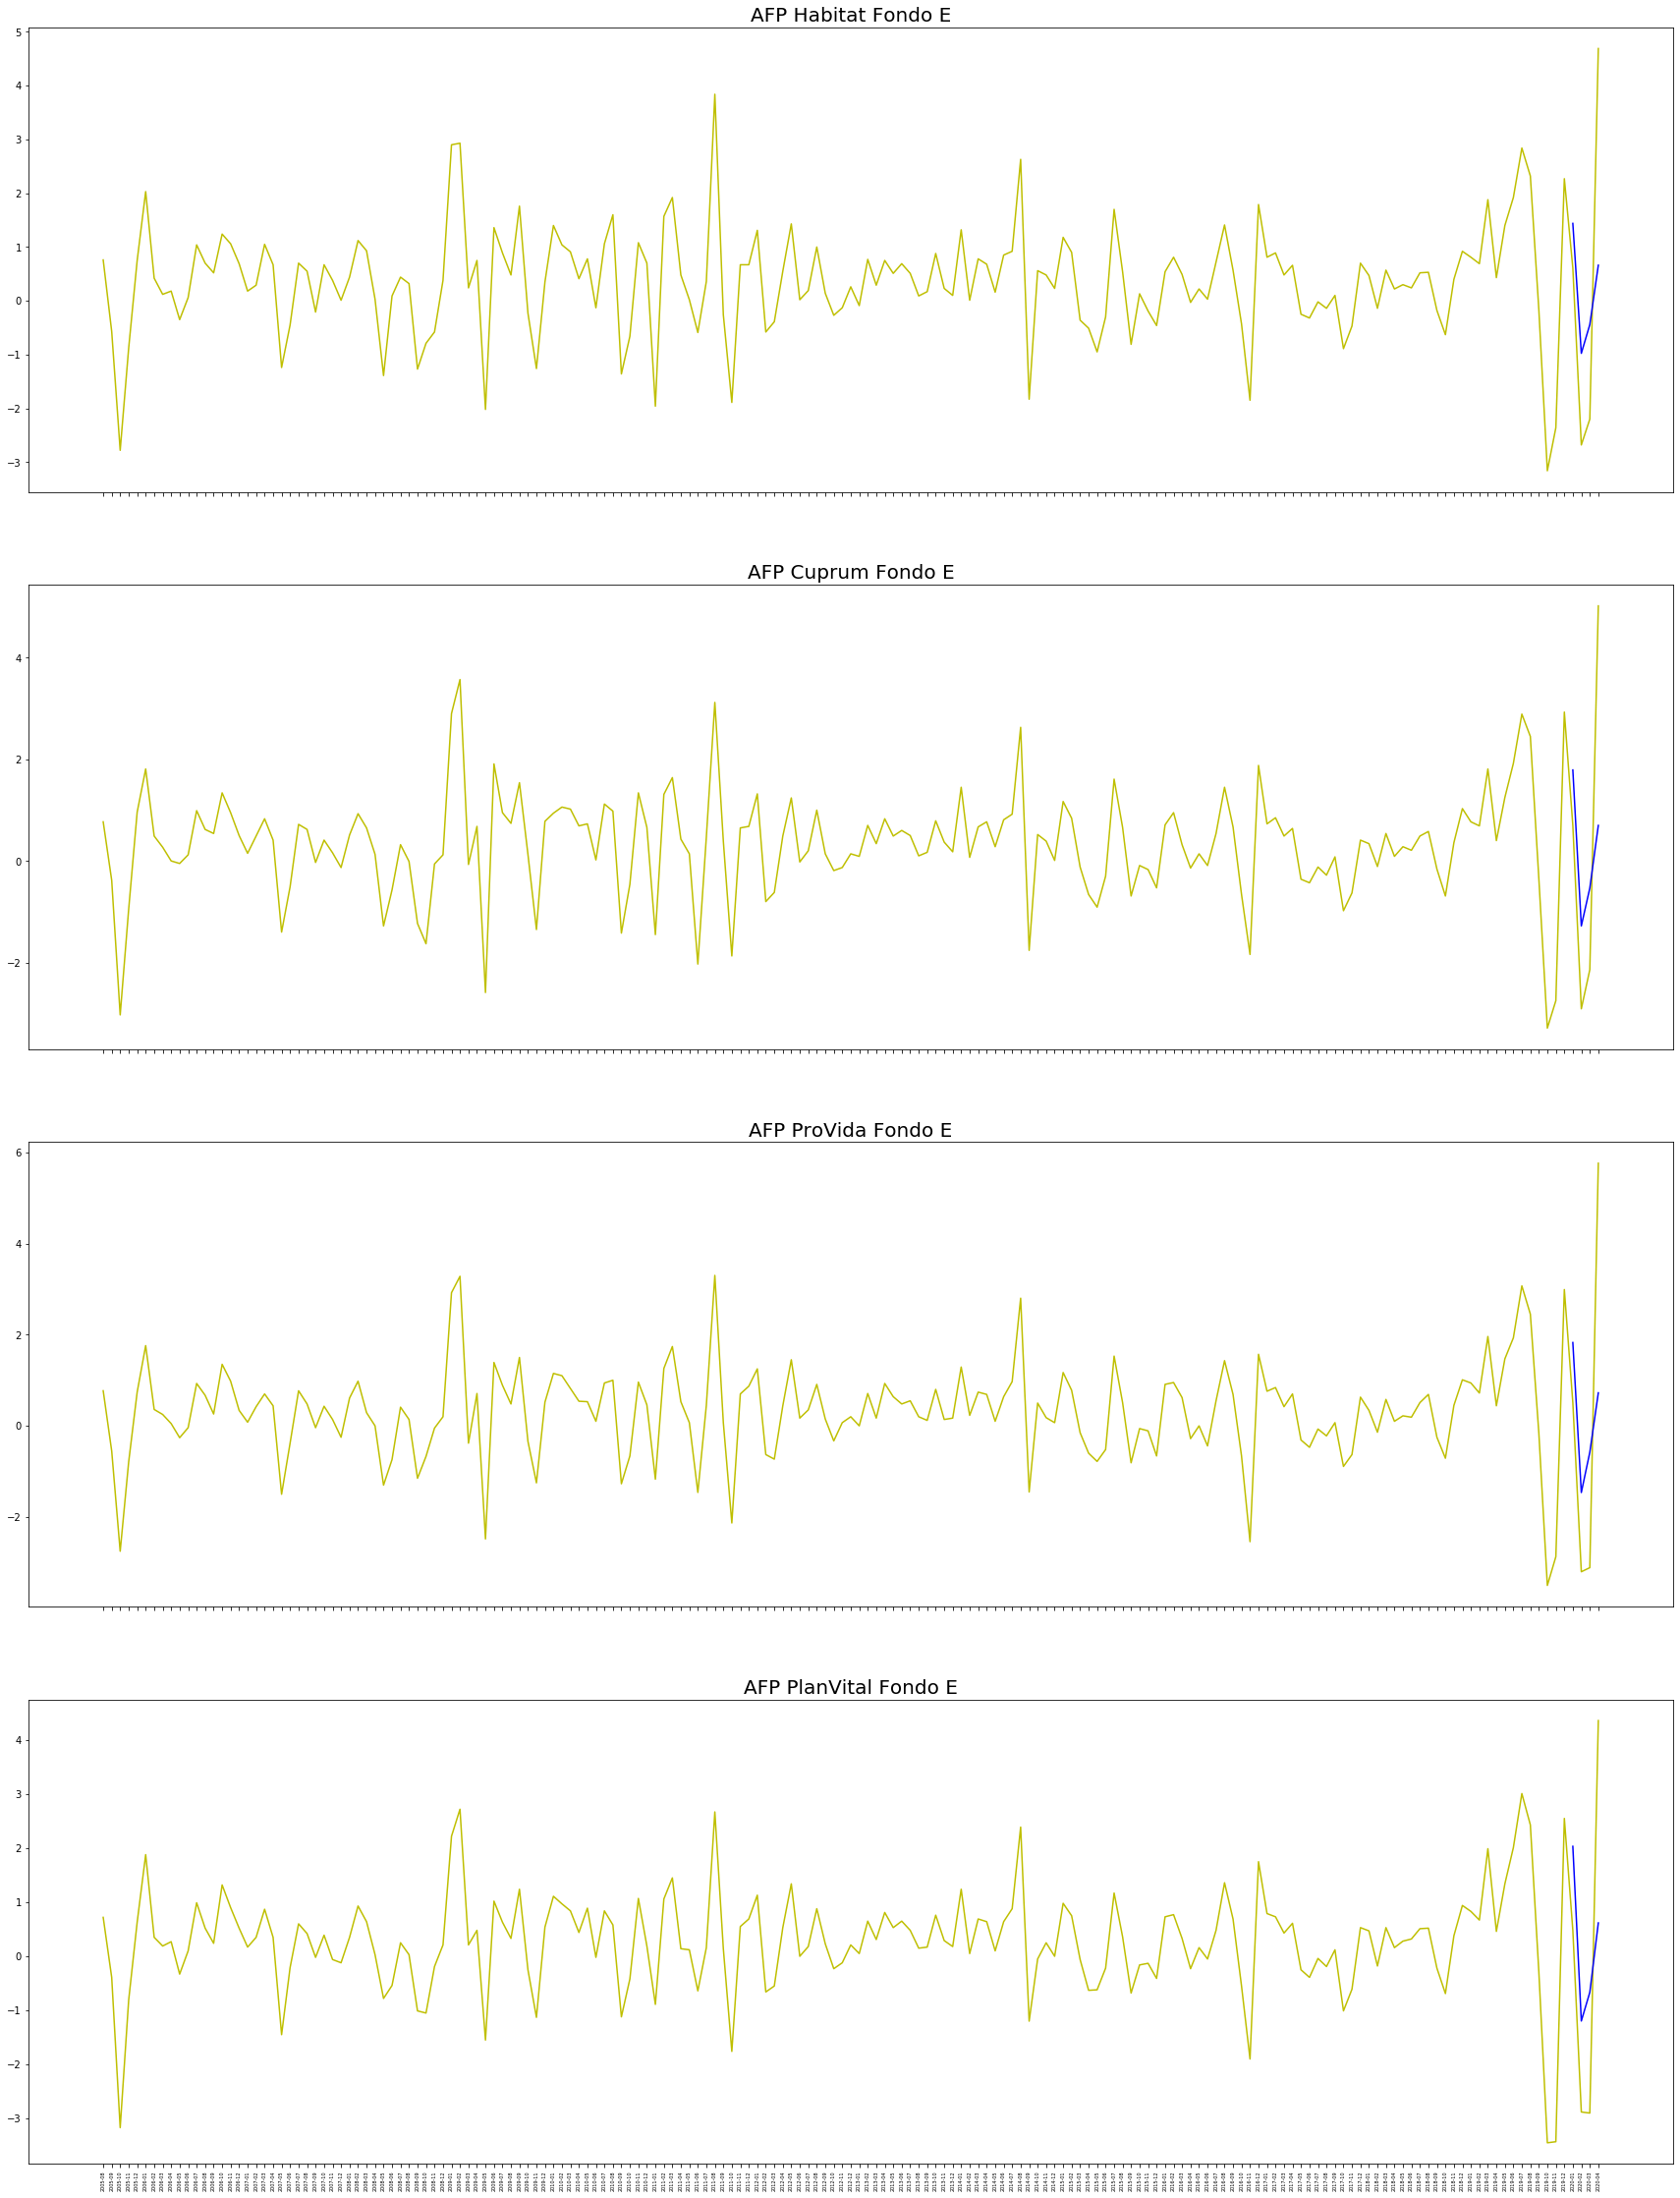

In [23]:
fig, axs = plt.subplots(4,sharex=True,figsize=(30,40))


axs[0].plot(habitat,c='y')
axs[0].plot(df_forecast['Habitat.E2d'],c='b')
axs[0].set_title('AFP Habitat Fondo E',fontsize=20)


axs[1].plot(cuprum,c='y')
axs[1].plot(df_forecast['Cuprum.E2d'],c='b')
axs[1].set_title('AFP Cuprum Fondo E',fontsize=20)



axs[2].plot(provida,c='y')
axs[2].plot(df_forecast['ProVida.E2d'],c='b')
axs[2].set_title('AFP ProVida Fondo E',fontsize=20)



axs[3].plot(planvital,c='y')
axs[3].plot(df_forecast['PlanVital.E2d'],c='b')
axs[3].set_title('AFP PlanVital Fondo E',fontsize=20)



plt.xticks(rotation=90,fontsize=5)
plt.show()

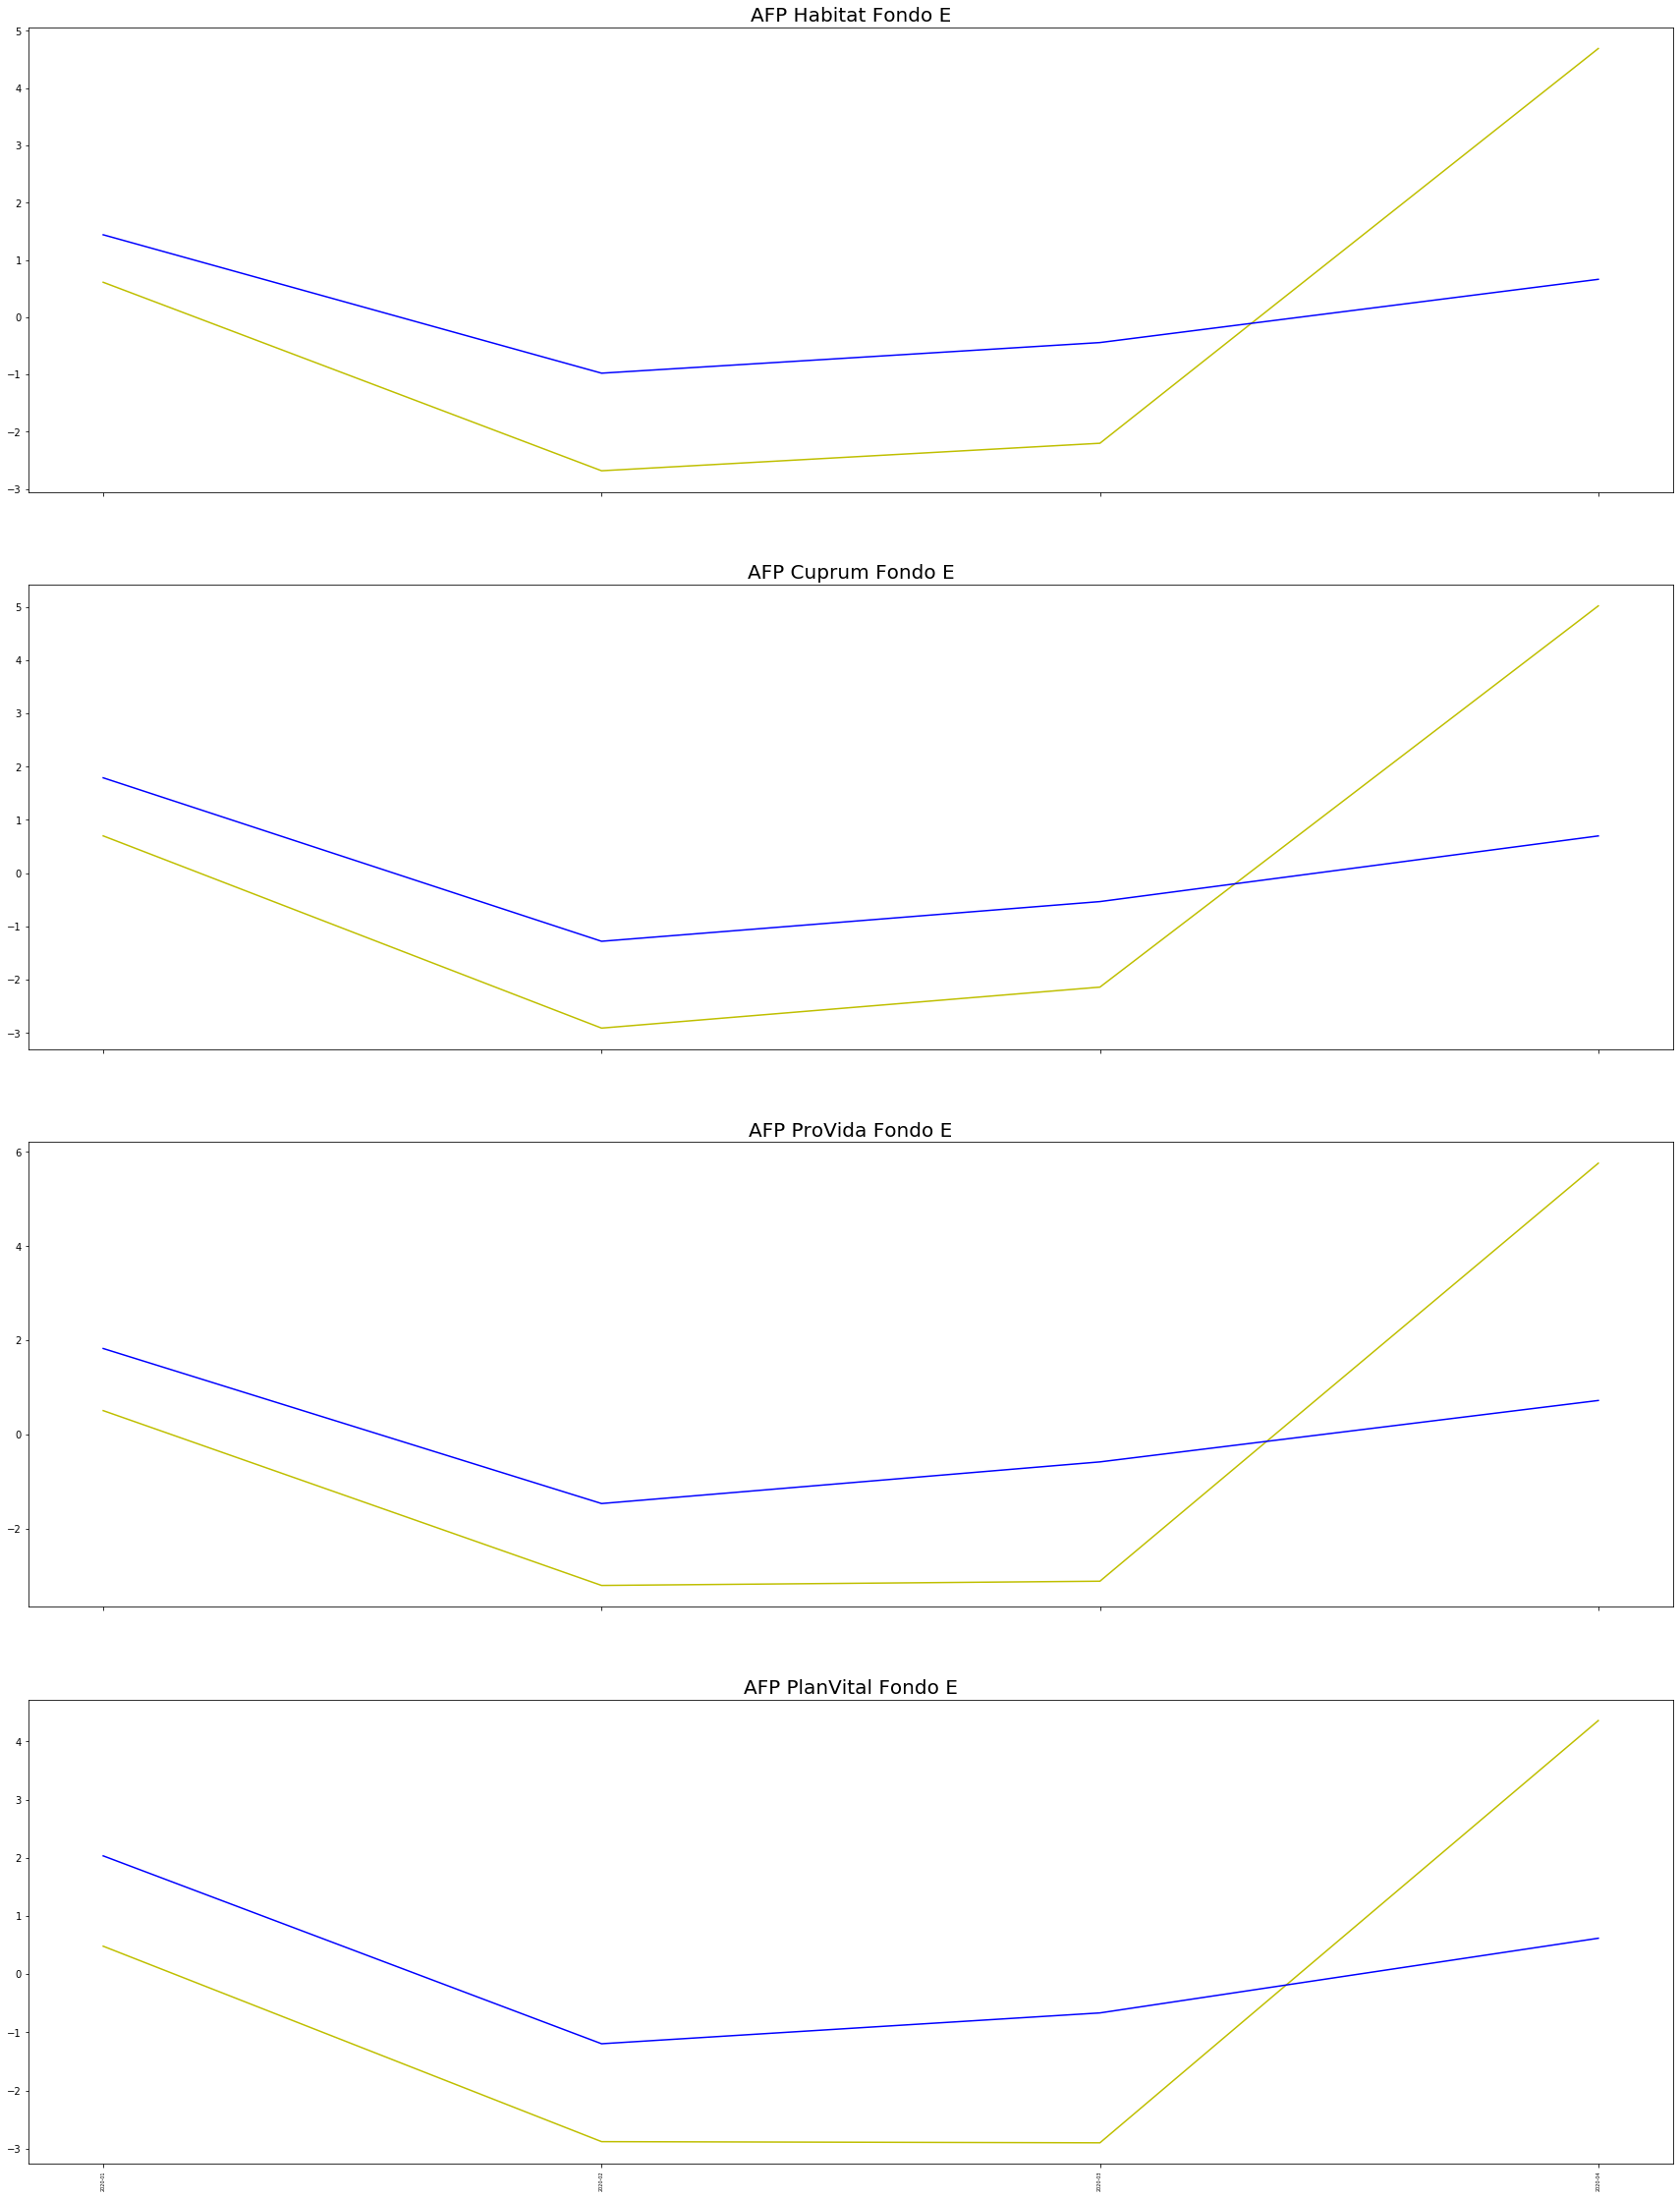

In [24]:
fig, axs = plt.subplots(4,sharex=True,figsize=(30,40))

#ci0=np.mean
axs[0].plot(E_4['Habitat.E'],c='y')
axs[0].plot(df_forecast['Habitat.E2d'],c='b')
axs[0].set_title('AFP Habitat Fondo E',fontsize=20)
axs[1].plot(E_4['Cuprum.E'],c='y')
axs[1].plot(df_forecast['Cuprum.E2d'],c='b')
axs[1].set_title('AFP Cuprum Fondo E',fontsize=20)



axs[2].plot(E_4['ProVida.E'],c='y')
axs[2].plot(df_forecast['ProVida.E2d'],c='b')
axs[2].set_title('AFP ProVida Fondo E',fontsize=20)



axs[3].plot(E_4['PlanVital.E'],c='y')
axs[3].plot(df_forecast['PlanVital.E2d'],c='b')
axs[3].set_title('AFP PlanVital Fondo E',fontsize=20)



plt.xticks(rotation=90,fontsize=5)
plt.show()

### g) Determine si la normalidad de los residuos del modelo es plausible usando un contraste de hipótesis con los valores proporcionados por la función normality.test del paquete VARS de R.

In [26]:
from scipy import stats

In [27]:
jarque_bera_test=stats.jarque_bera(E)

In [28]:
jarque_bera_test

(299.1075322951891, 0.0)

Se tiene que como el valo p<0.05 se rechaza la hipotesis nula, es decir hay suficiente evidencia para decir que los residuos no distribuyan normal